Trong bài lab này, em sẽ thực hiện một số thuật toán phân cụm không giám sát trên Bộ dữ liệu mẫu tóm tắt hành vi sử dụng của 8950 chủ thẻ tín dụng đang hoạt động trong 6 tháng qua.

Phân khúc khách hàng giúp tối ưu hóa tầm quan trọng của từng khách hàng đối với doanh nghiệp, điều chỉnh sản phẩm theo nhu cầu và hành vi riêng biệt của khách hàng. Nó cũng giúp doanh nghiệp đáp ứng mối quan tâm của các loại khách hàng khác nhau.

# **1. Load Dataset**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
data = pd.read_csv("Clustered_Customer_Data.csv")

In [ ]:
data.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
df = data.drop('Cluster',axis=1)
y = data['Cluster']

# **2. Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,4474.500000,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2583.786788,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,2237.250000,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,4474.500000,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,6711.750000,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,8949.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.isnull().sum()

Unnamed: 0                          0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df.nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         206
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

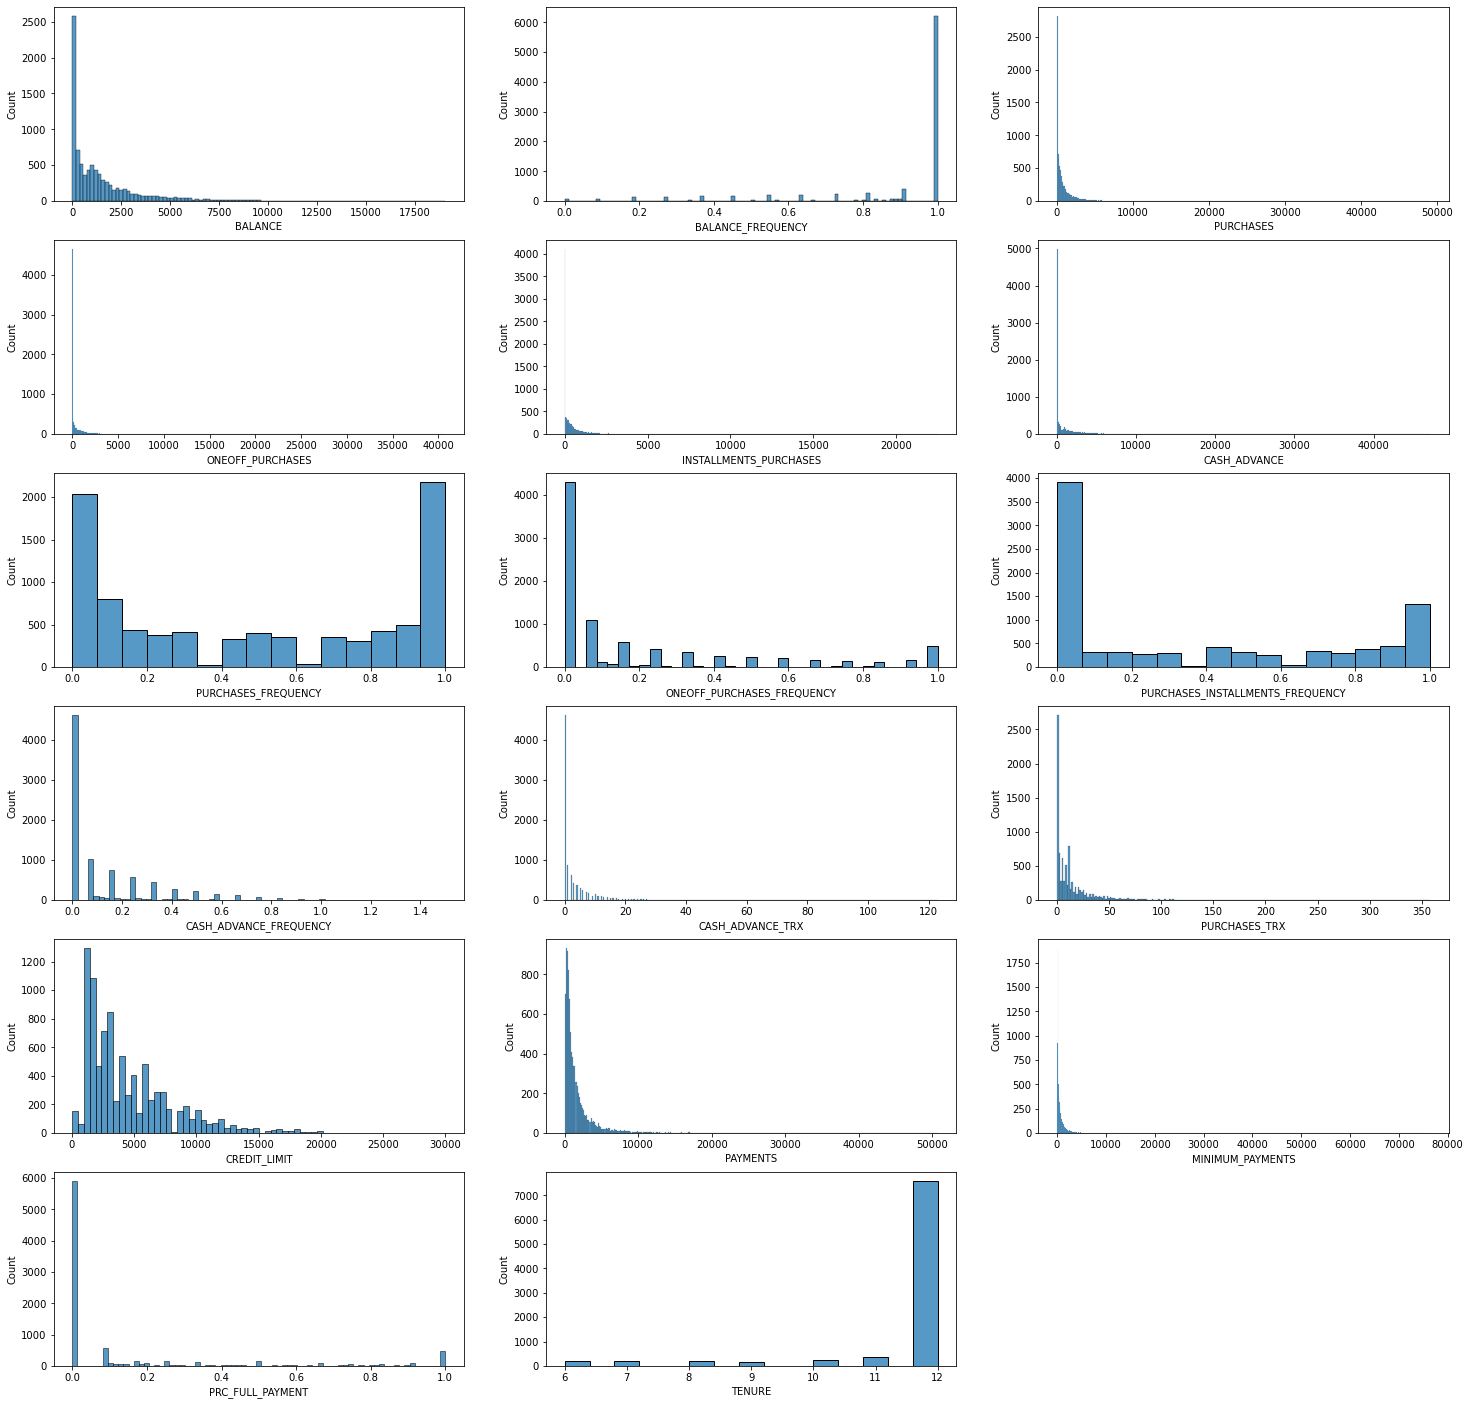

In [ ]:
plt.figure(figsize=(25,25))
for i, col in enumerate(df.columns):
    ax = plt.subplot(6, 3, i+1)
    sns.histplot(df[col])
    plt.xlabel(col)
plt.show()

In [ ]:
#df[df['BALANCE'] < 8000].count() #8774
#df[df['CREDIT_LIMIT'] < 15000].count() #8764
#df[df['BALANCE_FREQUENCY'] == 1].count() #6211
#df[df['PAYMENTS'] < 10000].count() #8779
#df[df['TENURE'] == 12].count() #7584

**Nhận xét:**
Với dataset có 8950 datapoints, 17 features:
- Có khoảng 98% người dùng có BALANCE dưới 8000 và CREDIT_LIMIT dưới 1500
- BALANCE_FREQUENCY 70% khách hàng là 1
- PURCHASES, ONEOFF_PURCHASES, INSTALLMENT_PURCHASES, CASH_ADVANCE cũng có xu hướng khách hàng giống với BALANCE và CREDIT_LIMIT
- (ONEOFF_PURCHASES, INSTALLMENT_PURCHASES --> PURCHASES)
- PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY và PURCHASES_INSTALLMENT_FREQUENCY, dữ liệu chia thành 3 nhóm khách hàng (nhóm KH {'không bao giờ', 'ít', 'thường xuyên'} dùng PURCHASES)
- Có thể thấy khách hàng sử dụng PURCHASES_INSTALLMENT (trả góp) nhiều hơn ONEOFF_PURCHASES (thanh toán 1 lần) (có thể thấy được điều đó thông qua chỉ số _FREQUENCY)
- PAYMENTS: 98% khách hàng chi trả số tiền dưới 10000 với MINIMUM_PAYMENTS dưới 5000
- 85% khách hàng sử dụng thẻ tín dụng trong 12 tháng

C:\Users\Thao\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thao\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thao\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thao\anaconda3\lib\site-p

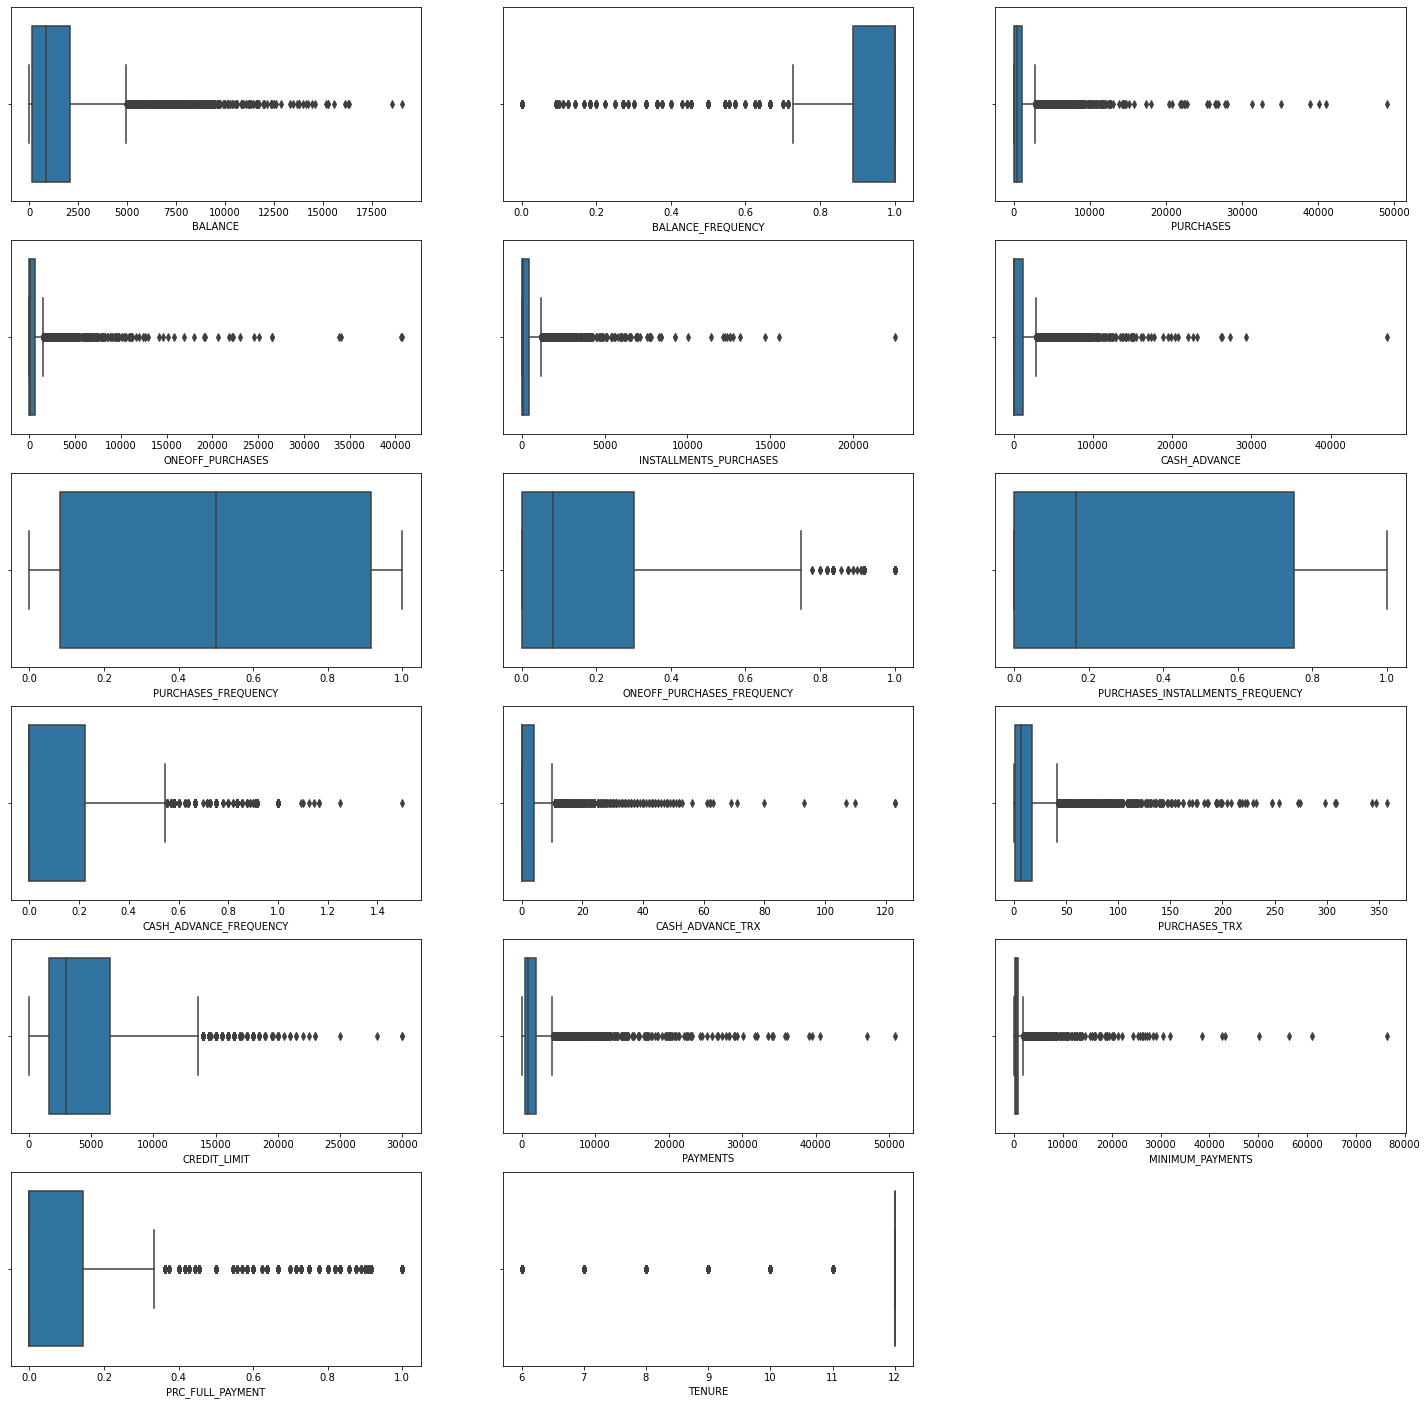

In [ ]:
plt.figure(figsize=(25,25))
for i, col in enumerate(df.columns):
    ax = plt.subplot(6, 3, i+1)
    sns.boxplot(df[col])
    plt.xlabel(col)

plt.show()

**Nhận xét:**
- Có thể thấy được là, có rất nhiều outliers

In [ ]:
# find outlier in all columns
for i in df.select_dtypes(include=['float64','int64']).columns:
    max_thresold = df[i].quantile(0.95)
    min_thresold = df[i].quantile(0.05)
    df_no_outlier = df[(df[i] < max_thresold) & (df[i] > min_thresold)].shape
    print(" outlier in ",i,"is" ,int(((df.shape[0]-df_no_outlier[0])/df.shape[0])*100),"%")

 outlier in  BALANCE is 10 %
 outlier in  BALANCE_FREQUENCY is 75 %
 outlier in  PURCHASES is 27 %
 outlier in  ONEOFF_PURCHASES is 53 %
 outlier in  INSTALLMENTS_PURCHASES is 48 %
 outlier in  CASH_ADVANCE is 56 %
 outlier in  PURCHASES_FREQUENCY is 47 %
 outlier in  ONEOFF_PURCHASES_FREQUENCY is 53 %
 outlier in  PURCHASES_INSTALLMENTS_FREQUENCY is 58 %
 outlier in  CASH_ADVANCE_FREQUENCY is 57 %
 outlier in  CASH_ADVANCE_TRX is 56 %
 outlier in  PURCHASES_TRX is 27 %
 outlier in  CREDIT_LIMIT is 14 %
 outlier in  PAYMENTS is 10 %
 outlier in  MINIMUM_PAYMENTS is 10 %
 outlier in  PRC_FULL_PAYMENT is 71 %
 outlier in  TENURE is 91 %


In [ ]:
# Detecting outliers using the Inter Quantile Range(IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
#calc Lower bound and upper bound
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
# check if value bigger than upper bound, or smaller than Lower bound
No_Outliers = df[(df < LB) | (df > UB)].count()
print('Number of Outliers at each column:\n')
print('-'*50)
DF_outlier = pd.DataFrame(No_Outliers, columns=['(No. Outliers)'])
# To show whole rows
pd.set_option('display.max_rows', DF_outlier.shape[0]+1)
print(DF_outlier)

Number of Outliers at each column:

--------------------------------------------------
                                  (No. Outliers)
BALANCE                                      695
BALANCE_FREQUENCY                           1493
PURCHASES                                    808
ONEOFF_PURCHASES                            1013
INSTALLMENTS_PURCHASES                       867
CASH_ADVANCE                                1030
PURCHASES_FREQUENCY                            0
ONEOFF_PURCHASES_FREQUENCY                   782
PURCHASES_INSTALLMENTS_FREQUENCY               0
CASH_ADVANCE_FREQUENCY                       525
CASH_ADVANCE_TRX                             804
PURCHASES_TRX                                766
CREDIT_LIMIT                                 248
PAYMENTS                                     808
MINIMUM_PAYMENTS                             774
PRC_FULL_PAYMENT                            1474
TENURE                                      1366


**Nhận xét:**
- Có thể thấy rằng, tập dữ liệu chứa rất nhiều outliers.
- Việc thay thế outliers bằng những giá trị khác có thể khiến kết quả phân cụm bị sai lệch; hay việc xoá outliers cũng cũng vậy, không hẳn outliers nào cũng bất lợi.
- Mục đích của tập dữ liệu này là phân cụm khách hàng nên là có thể những outliers này cũng sẽ được phân cụm theo nhóm riêng.

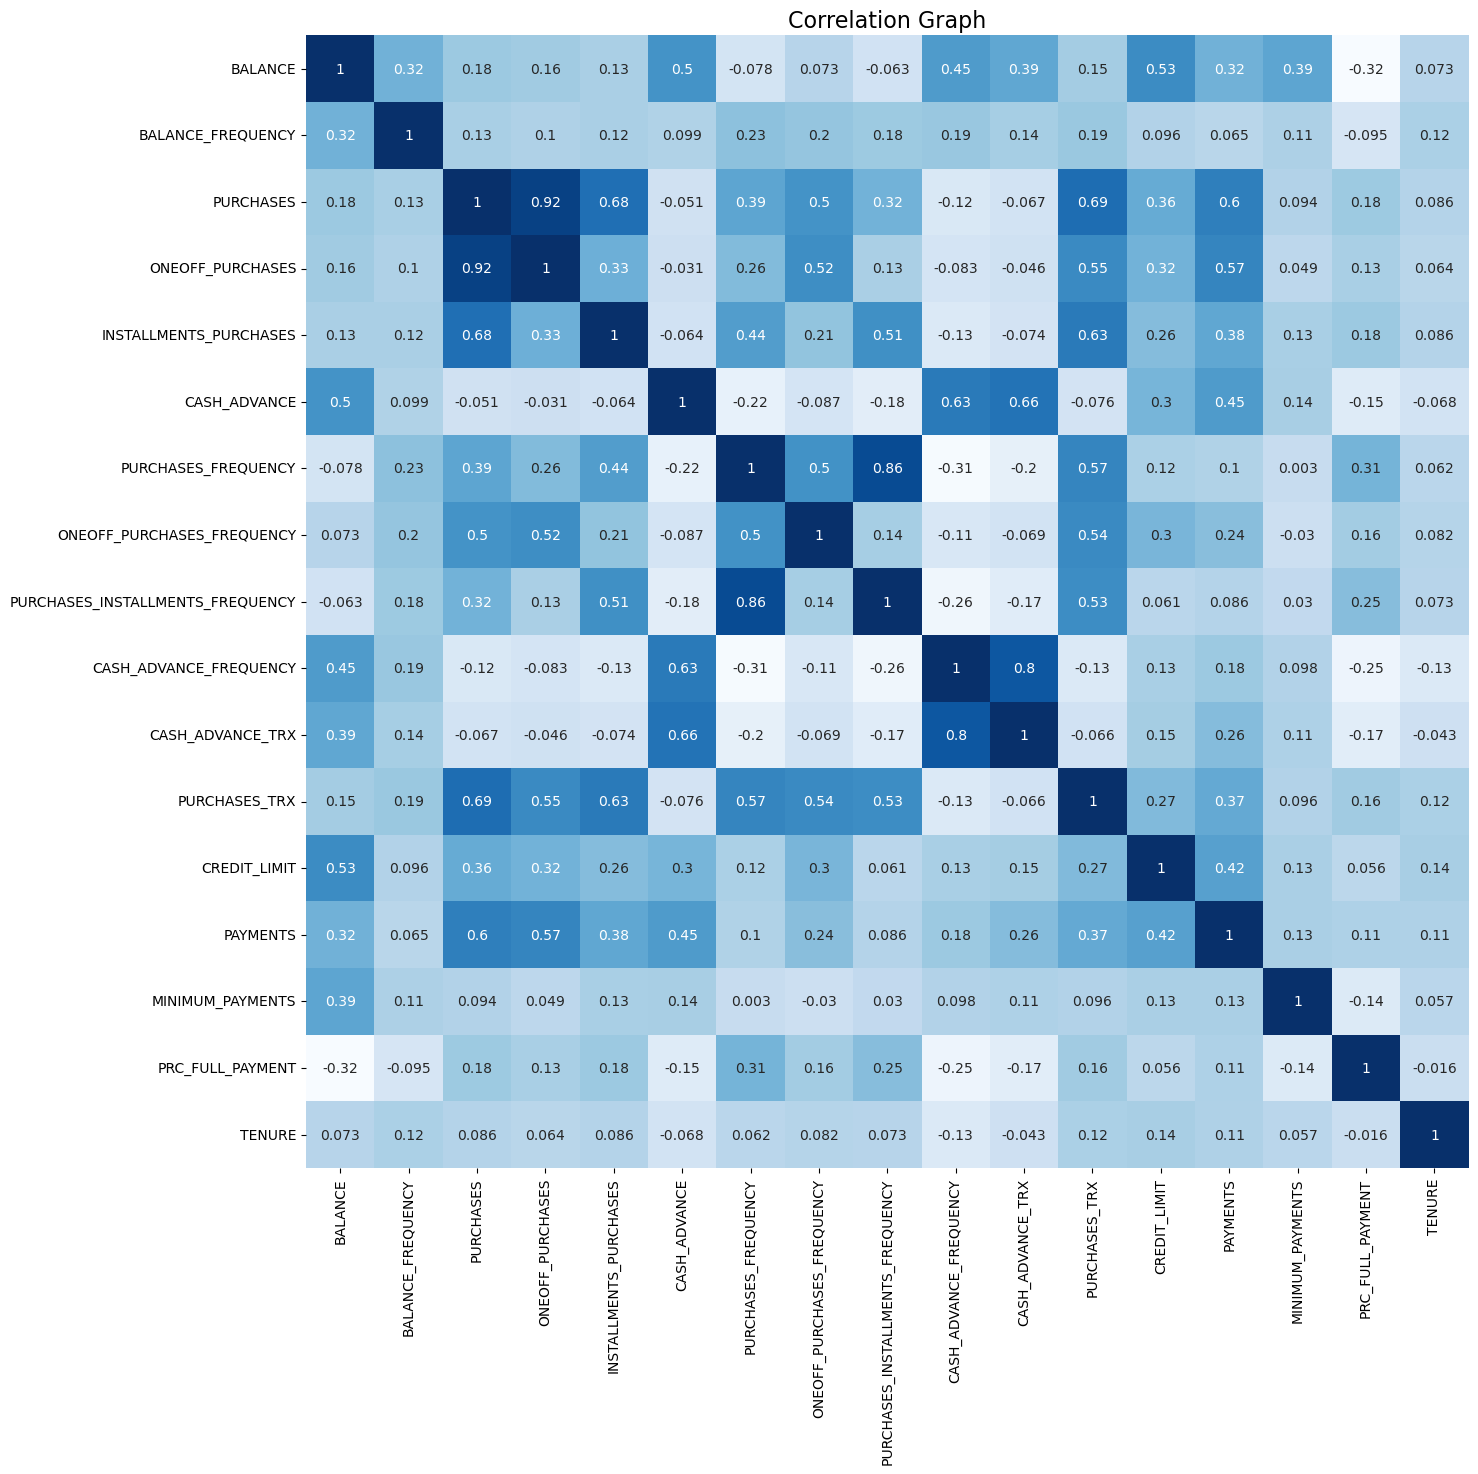

In [ ]:
plt.figure (figsize = [15,15] ,  dpi = 100 )
plt.title ("Correlation Graph" , fontsize = 16)
sns.heatmap (df.corr(), annot = True, cmap = 'Blues', cbar = False)
plt.show ()

**Nhận xét:**
- Mối tương quan giữa ONEOFF_PURCHASES và PURCHASES cao nhất là 92%
- Mối tương quan giữa PURCHASES_INSTALLMENT_FREQUENCY và PURCHASES_FREQUENCY là 86%
- Mối tương quan giữa CASH_ADVANCE_TRX và CASH_ADVANCE_FREQUENTLY là 80%


# **3. Data Preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
scaled_features = scaler.fit_transform (df)

In [ ]:
scaled_features[1]

array([ 0.78696085,  0.13432467, -0.46955188, -0.35693402, -0.45457623,
        2.60560451, -1.22175806, -0.67866081, -0.91699519,  0.57396272,
        0.11007385, -0.59179588,  0.68863903,  0.81864213,  0.08931021,
        0.2342269 ,  0.36067954])

# **4. Model Part**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from kneed import KneeLocator

In [ ]:
# Kmeans algorithm settings
kmeans_set = {"init":"random", "n_init":10, "max_iter":300, "random_state":42}
# Find inertia for k cluster
inertias = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

In [ ]:
#!pip install kneed

### **4.1. K-Elbow**

In [ ]:
def elbow_optimizer(inertias,name):

    kl = KneeLocator(range(1,11), inertias, curve='convex', direction="decreasing")
    plt.style.use("fivethirtyeight")
    sns.lineplot(x=range(1,11), y=inertias, marker='o')
    plt.xticks(range(1,11))
    plt.xlabel("Number of Clusters", labelpad=20)
    plt.ylabel("Inertia", labelpad=20)
    plt.title(f"Elbow Method for {name}", y=1.09)
    plt.axvline(x=kl.elbow, color = 'red', label='axvline-fullheight', ls='--')
    plt.show()

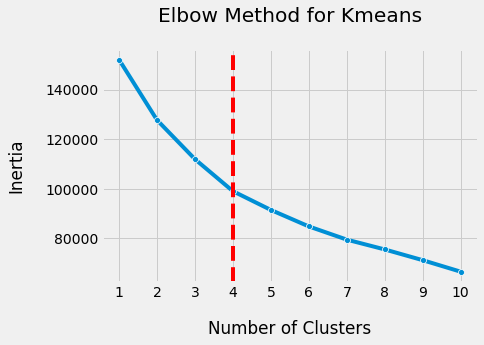

In [ ]:
# Implement elbow_optimizer function for KMeans
elbow_optimizer(inertias, 'Kmeans')

**Nhận xét:**
- Sử dụng phương pháp ELbow để tìm ra số cluster cho thuật toán KMeans là 4.
- Ngoài phương pháp Elbow trên, em có sử dụng thêm Silhouette và Calinki Harabasz để tìm ra số cluster thực sự phù hợp cho thuật KMeans

### **4.2. Silhouette Score, Calinski Harabasz Score**

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [ ]:
# Calculate silhouette_score and calinski_harabasz_score
def silhouette_and_calinski_score(data_input):
    silhouette_coef = []
    for k in range(2,11):
        kmeans = KMeans(n_clusters=k, **kmeans_set)
        kmeans.fit(data_input)
        score = silhouette_score(data_input, kmeans.labels_)
        silhouette_coef.append(score)

    calinski_harabasz_coef = []
    for k in range(2,11):
        kmeans = KMeans(n_clusters=k, **kmeans_set)
        kmeans.fit(data_input)
        score = calinski_harabasz_score(data_input, kmeans.labels_)
        calinski_harabasz_coef.append(score)
    return silhouette_coef, calinski_harabasz_coef

In [ ]:
def plot_evaluation(sh_score, ch_score, name, x=range(2,11)):
    """
    for draw evaluation plot include silhouette_score and calinski_harabasz_score.
        sh_score(list): include silhouette_score of models
        ch_score(list): include calinski_harabasz_score of models
        name(string): name of clustering algorithm
        x(list): has range of number for x axis
    """

    fig, ax = plt.subplots(1,2,figsize=(15,7), dpi=100)
    ax[0].plot(x, sh_score, marker='o', ms=9)
    ax[1].plot(x, ch_score, marker='o', ms=9)
    ax[0].set_xlabel("Number of Clusters", labelpad=20)
    ax[0].set_ylabel("Silhouette Coefficient", labelpad=20)
    ax[1].set_xlabel("Number of Clusters", labelpad=20)
    ax[1].set_ylabel("calinski Harabasz Coefficient", labelpad=20)
    plt.suptitle(f'Evaluate {name} Clustering',y=0.9)
    plt.tight_layout(pad=3)
    plt.show()

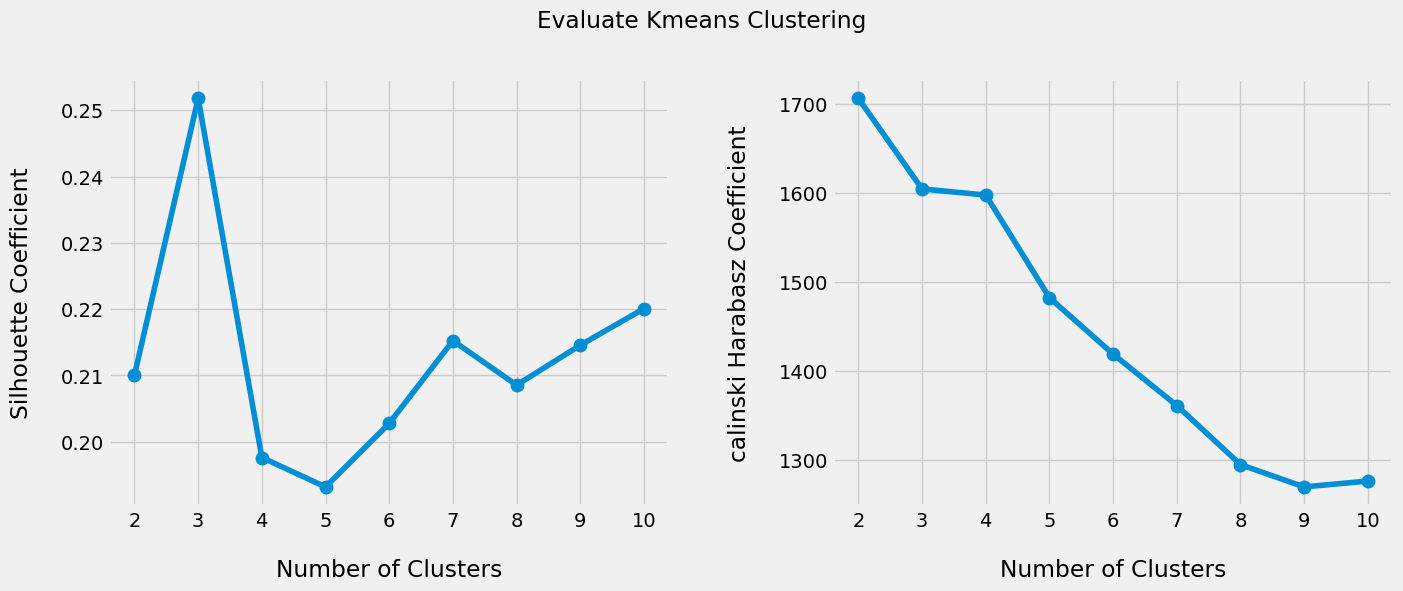

In [ ]:
silhouette_coef, calinski_harabasz_coef = silhouette_and_calinski_score(scaled_features)
plot_evaluation(silhouette_coef, calinski_harabasz_coef, 'Kmeans')

In [ ]:
silhouette_coef

[0.21006303333668366,
 0.25178745934850205,
 0.1976074492720698,
 0.1931688590154638,
 0.202755081788085,
 0.21522963769382036,
 0.20853465664037898,
 0.21455543651404646,
 0.22006831348889158]

In [ ]:
calinski_harabasz_coef

[1706.139830675086,
 1604.3984342151036,
 1597.5222026386095,
 1482.1590031667513,
 1418.717373815264,
 1360.9061533648082,
 1294.52058642714,
 1269.420110350051,
 1276.0742692819604]

**Nhận xét:**
- Kết quả là với 2 phương pháp khác nêu trên, quan sát 2 biểu đồ trên có thể thấy: số cluster phù hợp là 3. (giá trị càng cao thì số cluster đó càng phù hợp)
- với phương pháp Calinski Harabasz, số cluster có thể là 3 hoặc 4
- Vậy em sẽ thử check Kmeans với k ={3,4}, xem xem là số Cluster nào là phù hợp

#### **4.2.1. K-Cluster = 3**

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 29)
y_kmeans = kmeans.fit(scaled_features)
labels = kmeans.labels_

C:\Users\Thao\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.cluster_centers_.shape

(3, 17)

In [ ]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)

In [ ]:
centroids = pd.DataFrame(data = kmeans.cluster_centers_,columns = [df.columns])
centroids

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.367396,-0.177663,-0.232898,-0.204408,-0.175047,-0.309514,-0.062796,-0.234992,-0.048401,-0.334251,-0.298804,-0.243583,-0.336467,-0.284403,-0.135429,0.007045,-0.028208
1,0.318798,0.439955,1.527871,1.279683,1.261207,-0.247131,1.143105,1.559745,0.957043,-0.358687,-0.251049,1.680394,0.891538,0.835329,0.155336,0.494645,0.303246
2,1.161463,0.340325,-0.290464,-0.207468,-0.305709,1.377858,-0.644545,-0.307119,-0.555630,1.559078,1.339837,-0.367625,0.599350,0.443301,0.398847,-0.410076,-0.126713


In [ ]:
df_centroids = scaler.inverse_transform(centroids)
df_centroids = pd.DataFrame(data = df_centroids,columns = [df.columns])
df_centroids

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,799.771040,0.835184,505.615025,253.161504,252.774371,329.805632,0.465148,0.132355,0.345201,0.068257,1.209709,8.655280,3270.246492,909.825781,548.594759,0.155775,11.479568
1,2228.026120,0.981492,4267.525421,2716.449393,1551.561464,460.625971,0.949134,0.667760,0.744791,0.063367,1.535599,56.478155,7738.228155,4151.340126,1226.211303,0.298390,11.923139
2,3981.961277,0.957891,382.624762,248.083296,134.618954,3868.303195,0.231664,0.110838,0.143616,0.447132,12.392231,5.572055,6675.128161,3016.457991,1793.702161,0.033774,11.347744


In [ ]:
df_cluster_summary = df_cluster.groupby('cluster').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

df_cluster_summary = pd.DataFrame(df_cluster_summary.T.values[1:], columns = list(df_cluster_summary.T))

In [ ]:
#df_cluster_summary.info()
col = list(df_cluster_summary)
df_cluster_summary[col] = df_cluster_summary[col].astype(float)
df_cluster_summary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,799.702576,0.835188,505.532394,253.120131,252.733061,329.866776,0.465072,0.132333,0.345145,0.068316,1.211636,8.653865,3269.793763,909.729614,548.525315,0.155750,11.478836
1,2220.003291,0.981477,4268.520980,2717.828543,1551.178267,458.421147,0.949093,0.668166,0.744584,0.063014,1.528745,56.472065,7733.967611,4151.276172,1224.538588,0.298632,11.923077
2,3989.326804,0.957980,384.528277,248.718133,135.887632,3869.856855,0.232290,0.110942,0.144242,0.447176,12.390351,5.612155,6682.960242,3018.907202,1795.687341,0.033774,11.350877


In [ ]:
err = sum(sum(abs(df_cluster_summary.values - df_centroids.values)))
print(err)

44.953911355546325


In [ ]:
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


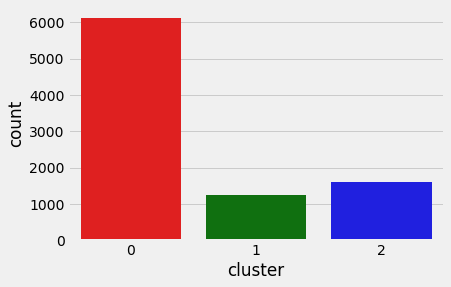

In [ ]:
sns.countplot(x=df_cluster.cluster, palette =['red','green','blue'])
plt.show()

#### **4.2.2. K-Cluster = 4**

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 29)
y_kmeans = kmeans.fit(scaled_features)
labels = kmeans.labels_

C:\Users\Thao\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.cluster_centers_.shape

(4, 17)

In [ ]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)

In [ ]:
centroids = pd.DataFrame(data = kmeans.cluster_centers_,columns = [df.columns])
centroids

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.265124,-0.368498,-0.343133,-0.230485,-0.387692,-0.182166,-0.797514,-0.389442,-0.713979,-0.101056,-0.164396,-0.474814,-0.334455,-0.261784,-0.119179,-0.258928,-0.052764
1,-0.321755,0.242492,0.109083,0.000939,0.255974,-0.366732,0.983944,0.317283,0.874358,-0.463030,-0.360443,0.297022,-0.077076,-0.138802,-0.091816,0.395230,0.057654
2,0.954485,0.462694,3.125845,2.713251,2.406470,-0.155091,1.136338,1.798653,1.065918,-0.319096,-0.170458,3.003251,1.429882,1.919096,0.477421,0.454703,0.324140
3,1.459738,0.384642,-0.234471,-0.163753,-0.253648,1.689647,-0.504769,-0.212550,-0.450162,1.746927,1.618157,-0.283457,0.839667,0.604574,0.491129,-0.406268,-0.097529


In [ ]:
df_centroids = scaler.inverse_transform(centroids)
df_centroids = pd.DataFrame(data = df_centroids,columns = [df.columns])
df_centroids

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1012.641956,0.789977,270.095923,209.879852,60.482959,596.861466,0.170270,0.086280,0.080684,0.114922,2.126948,2.907743,3277.563545,975.304518,586.464879,0.077983,11.446707
1,894.768927,0.934715,1236.263333,593.995933,642.541696,209.816318,0.885255,0.297109,0.711930,0.042487,0.789067,22.092692,4214.013741,1331.325429,650.233383,0.269313,11.594474
2,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
3,4602.795247,0.968389,502.252865,320.641328,181.696475,4522.139944,0.287762,0.139050,0.185532,0.484722,14.291562,7.664160,7549.502544,3483.325191,2008.762146,0.034888,11.386800


In [ ]:
df_cluster_summary = df_cluster.groupby('cluster').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')
df_summary = df_cluster_summary.copy()

df_cluster_summary = pd.DataFrame(df_cluster_summary.T.values[1:], columns = list(df_cluster_summary.T))

In [ ]:
#df_cluster_summary.info()
col = list(df_cluster_summary)
df_cluster_summary[col] = df_cluster_summary[col].astype(float)
df_cluster_summary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1011.839396,0.789924,270.144981,209.932625,60.479311,596.300906,0.170250,0.086301,0.080662,0.114888,2.125974,2.907468,3277.256169,975.330332,586.261175,0.078002,11.446568
1,894.768927,0.934715,1236.263333,593.995933,642.541696,209.816318,0.885255,0.297109,0.711930,0.042487,0.789067,22.092692,4214.013741,1331.325429,650.233383,0.269313,11.594474
2,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
3,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312


In [ ]:
err = sum(sum(abs(df_cluster_summary.values - df_centroids.values)))
print(err)

9.715175417057534


In [ ]:
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


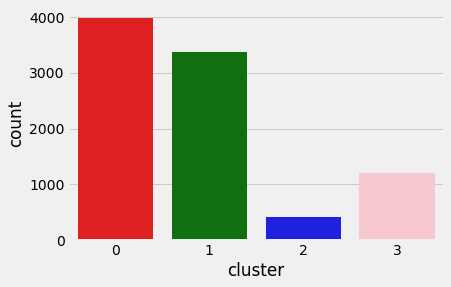

In [ ]:
sns.countplot(x=df_cluster.cluster, palette = ['red','green','blue','pink'])
plt.show()

**Nhận xét**
- Sau khi thử xây dựng Kmeans với k-cluster = {3,4} thì k-cluster=4 cho sai số ít hơn k-cluster=3 (9,71 < 44,95)

**Kết luận:** em sẽ chọn k-cluster = 4 cho dataset này

### **4.3. PCA**

In [ ]:
from sklearn.decomposition import PCA #Khai báo thư viện PCA
 #khai báo

In [ ]:
def pca_kdims_for4cluster(kdims, input_data):
    pca = PCA(n_components=len(df.columns))
    pca.fit(input_data)
    pca = PCA(n_components=kdims)
    if kdims == 2:
        pca_df = pd.DataFrame(pca.fit_transform(input_data), columns=["pca_1", "pca_2"])#tạo ra dataframe với 2 thành phàn là pca1, pca2
        pca_df_kmeans = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
        pca_df_centroids = pd.DataFrame(pca.fit_transform(centroids), columns=["pca_1", "pca_2"])
        plt.figure(figsize=(10,10))
        plt.style.use('ggplot')
        ax = sns.scatterplot(x="pca_1", y="pca_2", hue = "cluster", data = pca_df_kmeans, palette =['red','green','blue','pink'])
        plt.scatter(x="pca_1", y="pca_2", data = pca_df_centroids, c ='yellow', s=50)
        plt.title('Clustering using K-Means Algorithm')

    if kdims == 3:
        pca_df = pd.DataFrame(pca.fit_transform(input_data), columns=["pca_1", "pca_2", 'pca_3'])
        pca_df_kmeans = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
        X = pca_df_kmeans.copy()
        cluster_colors = np.array(['red','green','blue','pink'])
        colors = cluster_colors[labels]
        plt.figure(figsize=(10, 10))
        ax = plt.subplot(projection="3d")
        ax.scatter(pca_df.pca_1, pca_df.pca_2, pca_df.pca_3, c=colors)
        plt.title('Clustering using K-Means Algorithm')

    return (plt.show())

In [ ]:
#df.BALANCE[df.BALANCE > 1500]

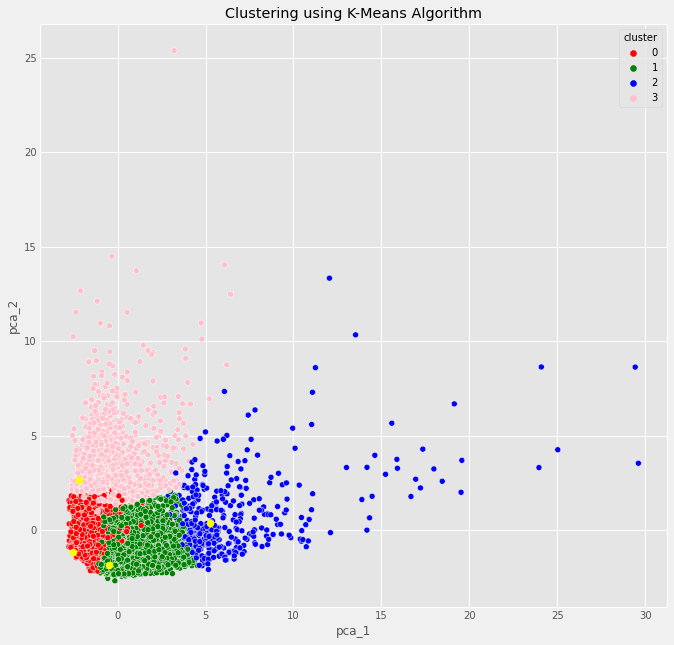

In [ ]:
pca_kdims_for4cluster(2, scaled_features)

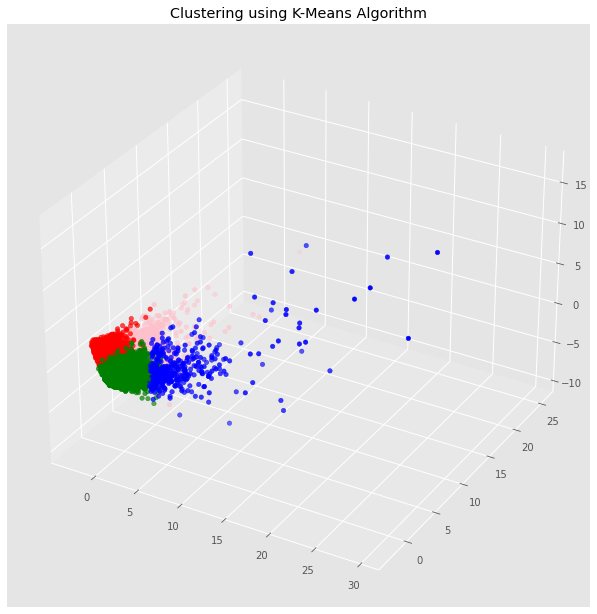

In [ ]:
pca_kdims_for4cluster(3, scaled_features)

**Nhận xét:**
Outliers thuộc cluster 2 và cluster 3

# **5. Data Analysis after using K-Means Algorthm**

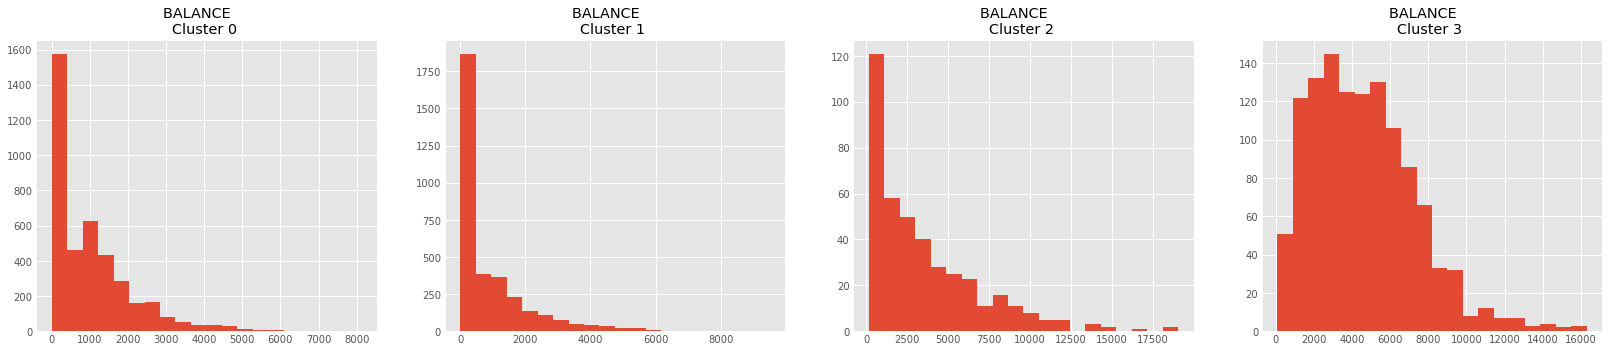

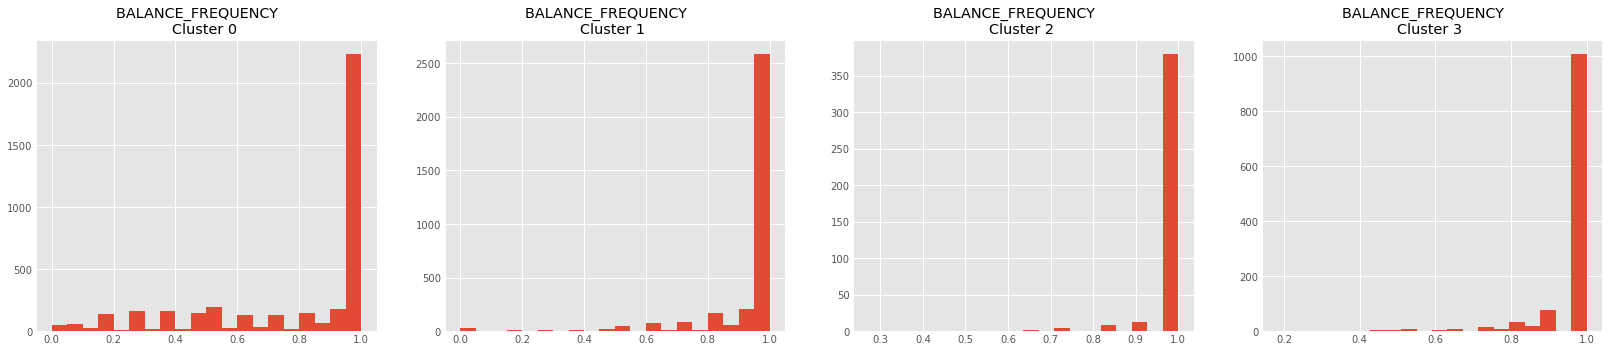

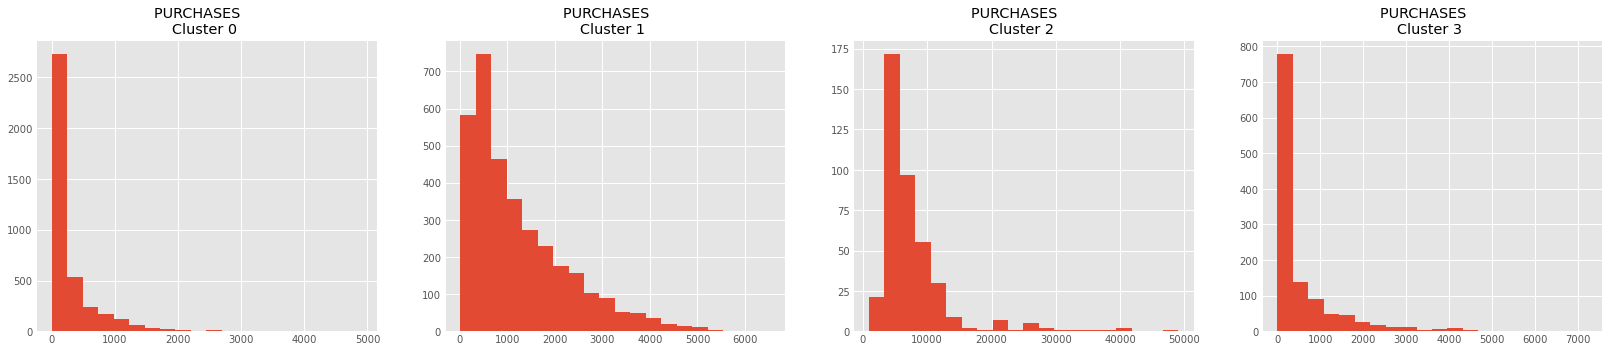

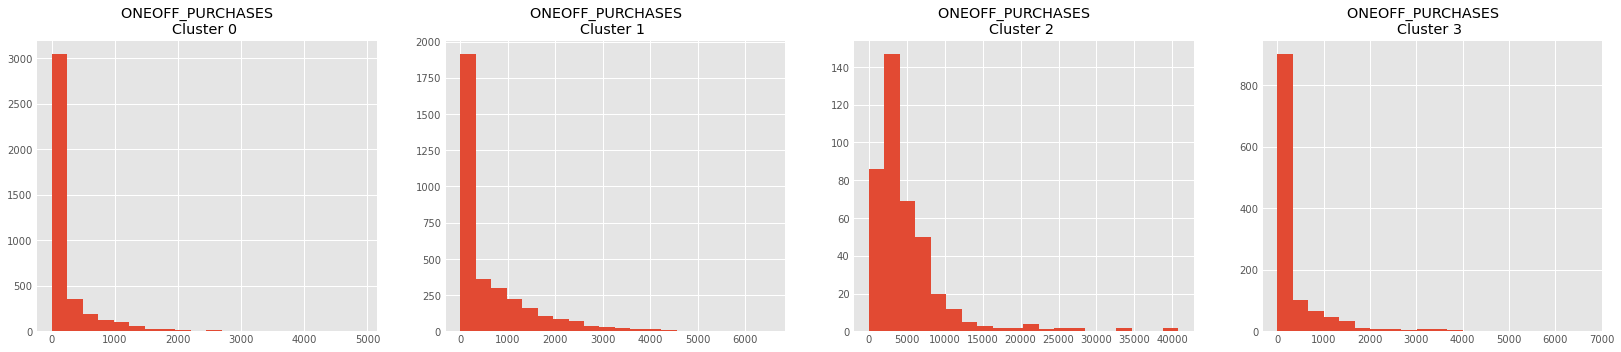

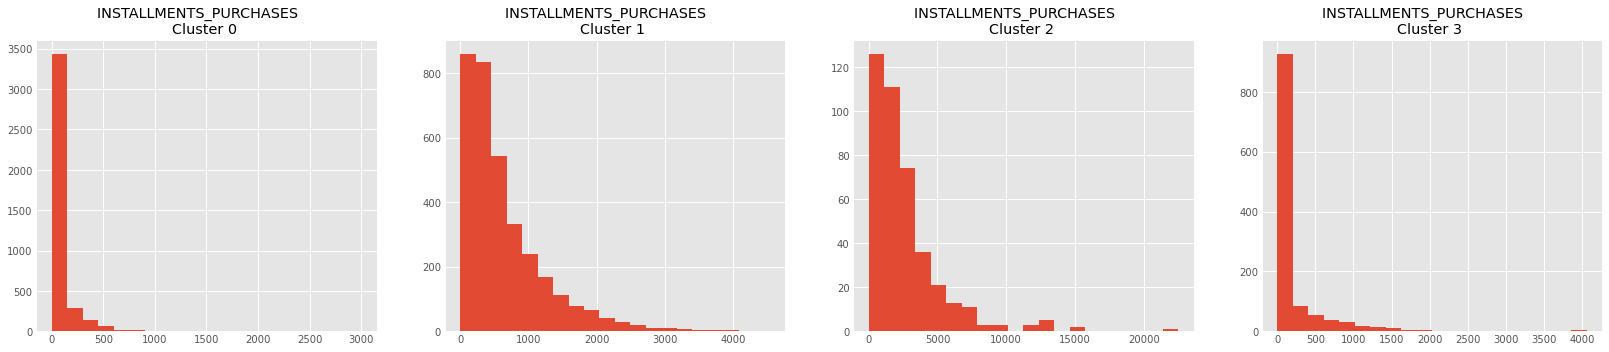

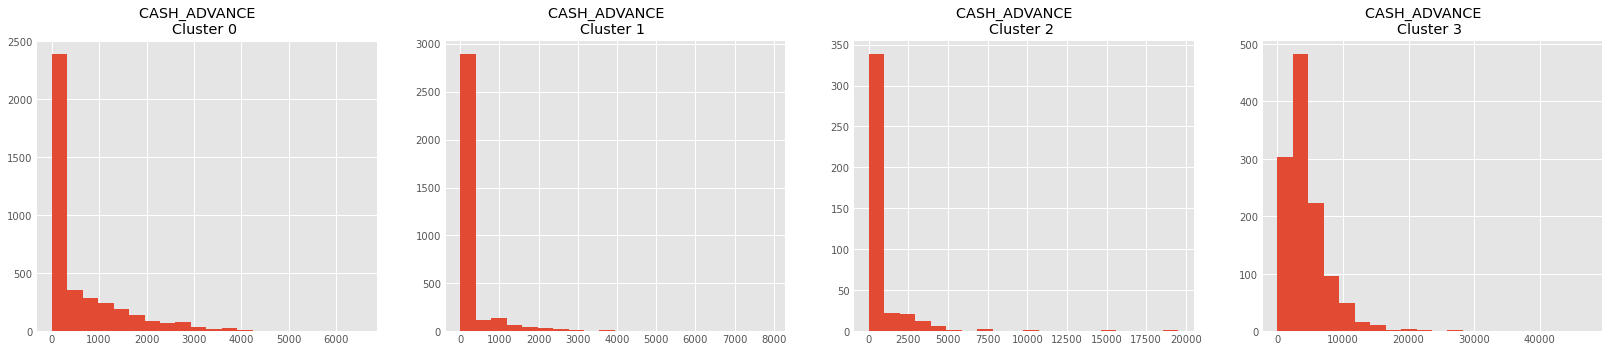

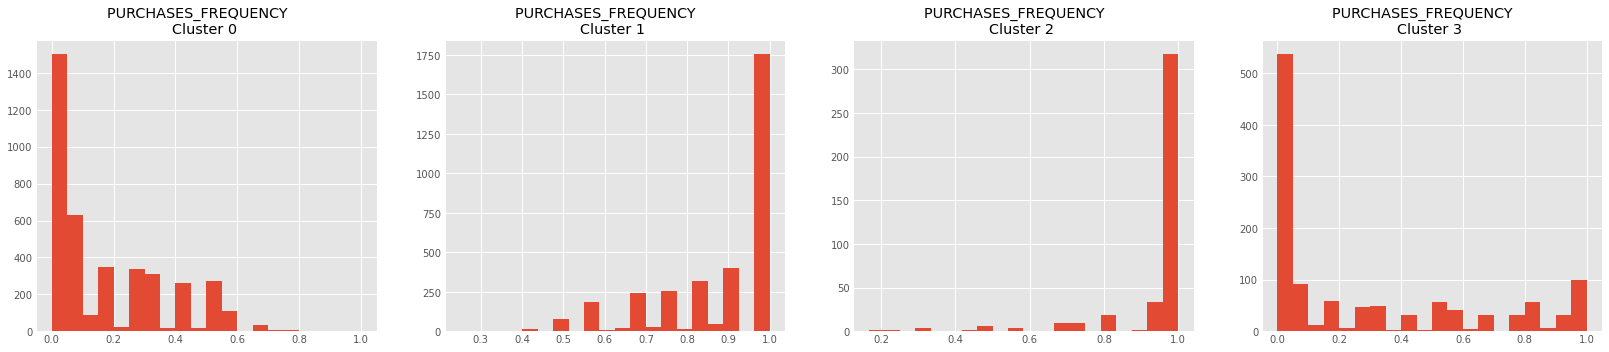

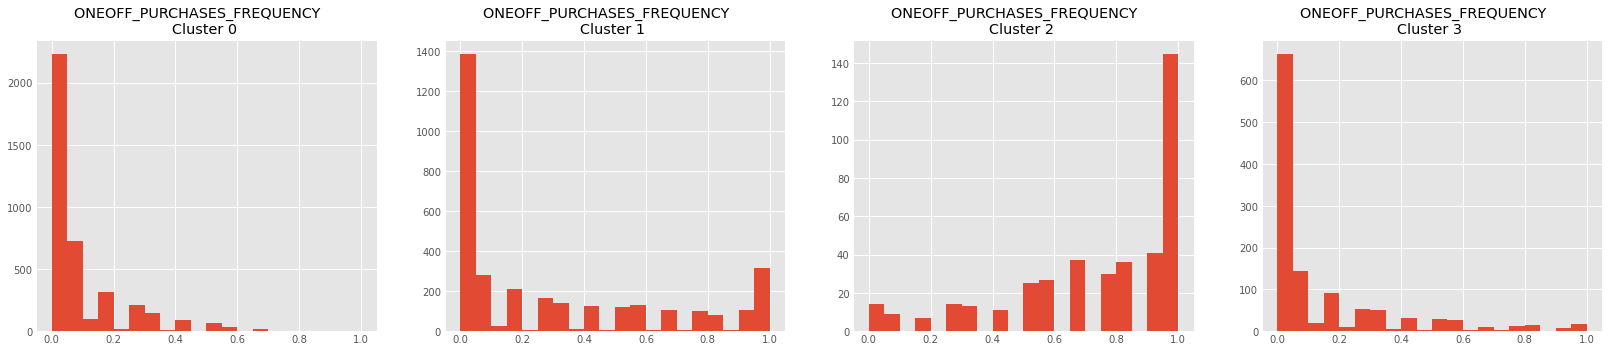

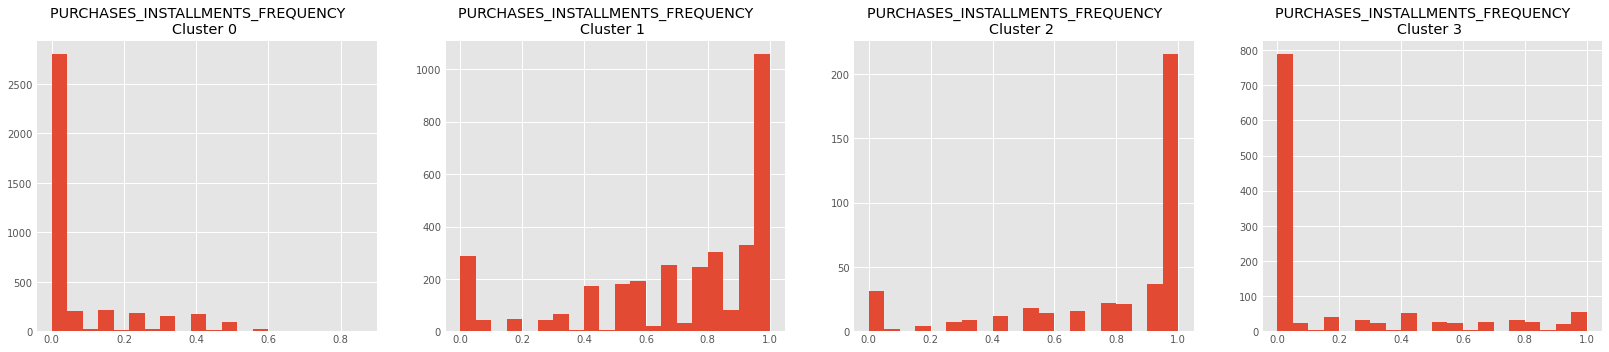

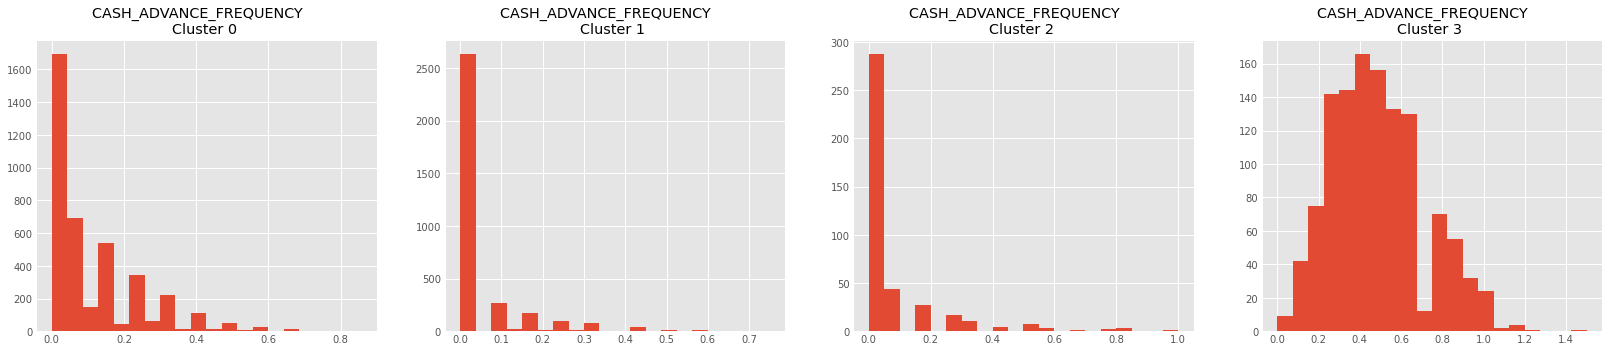

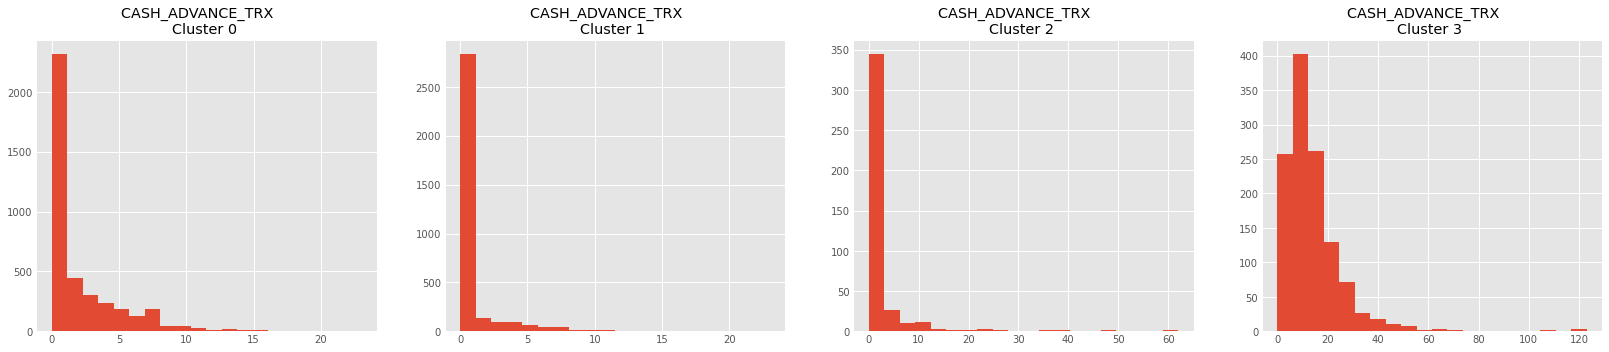

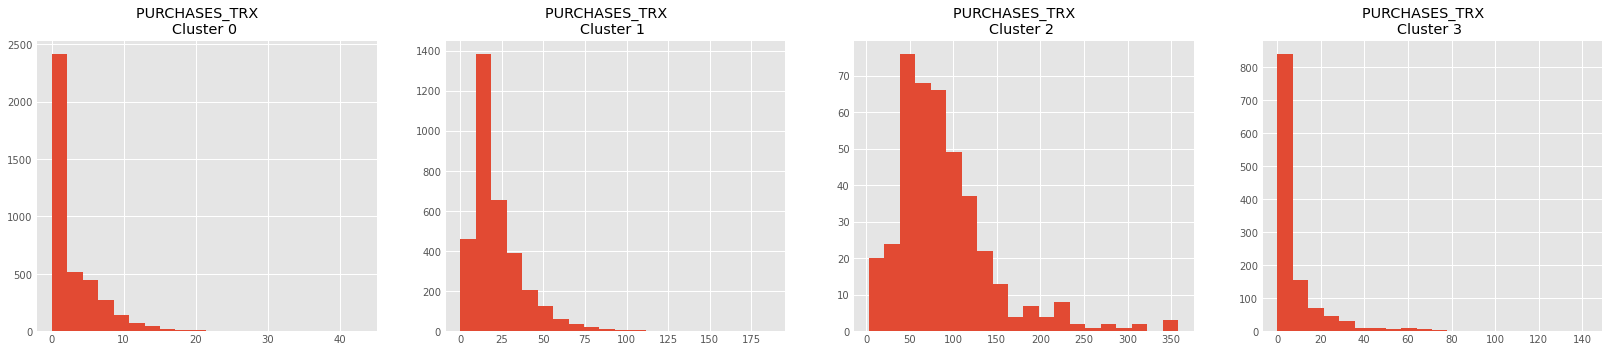

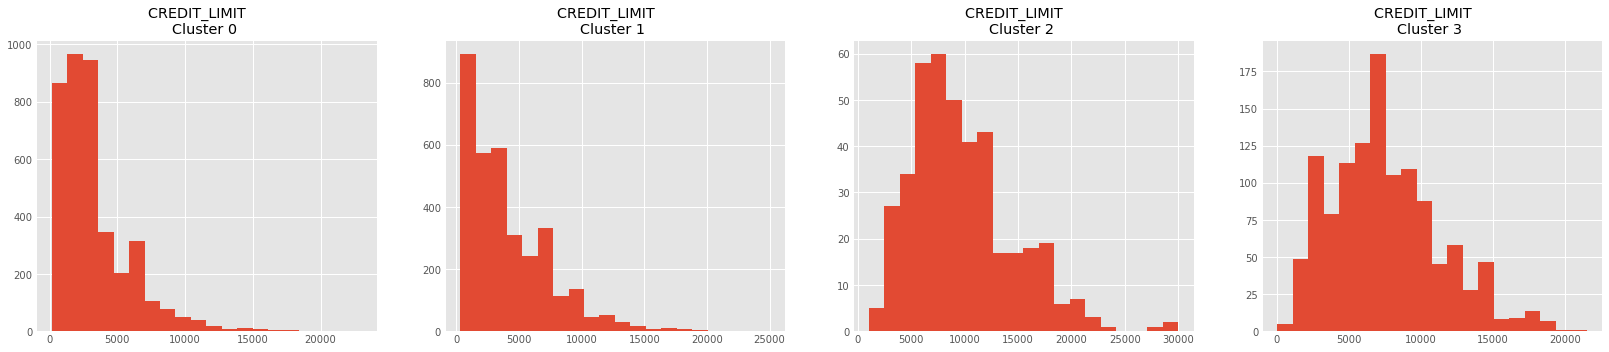

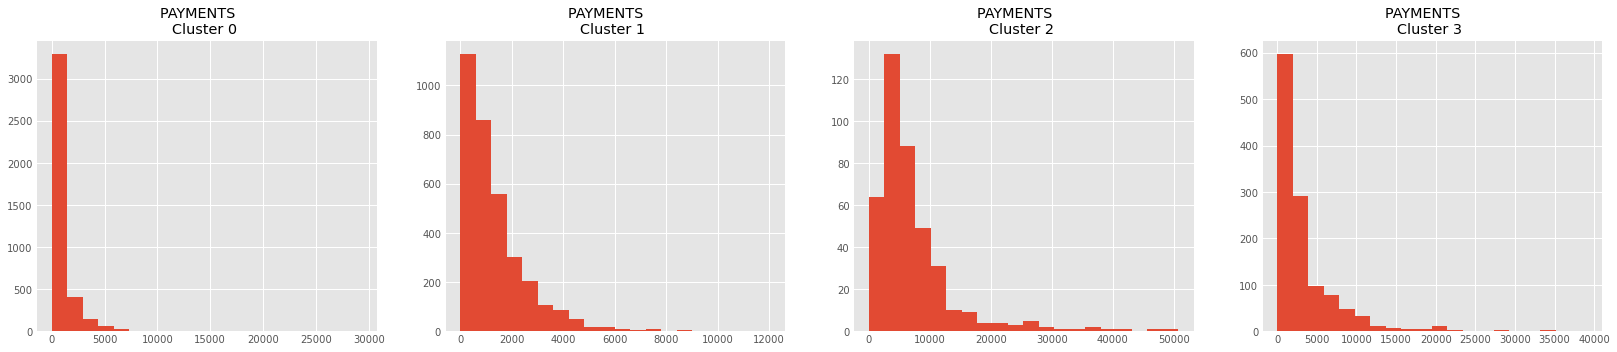

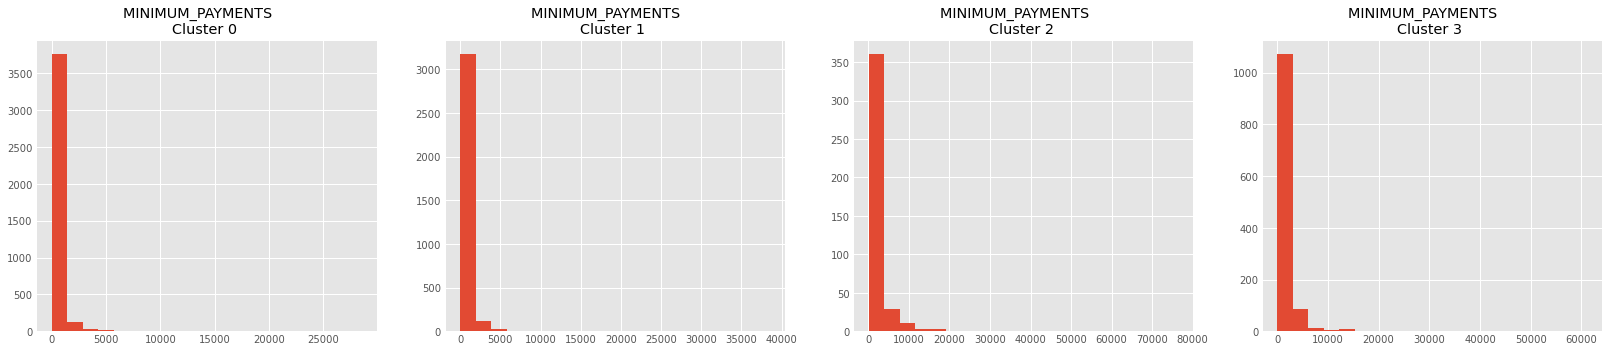

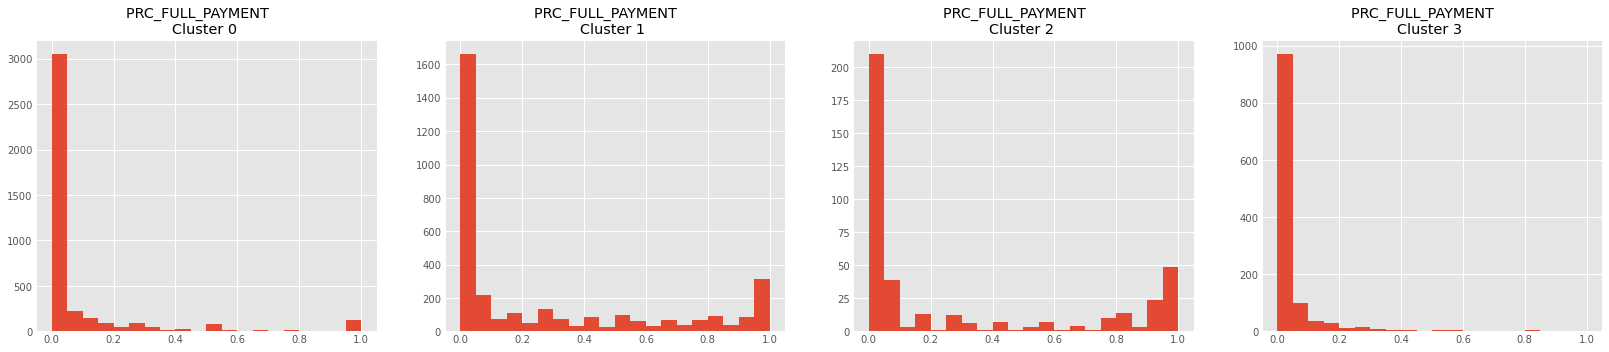

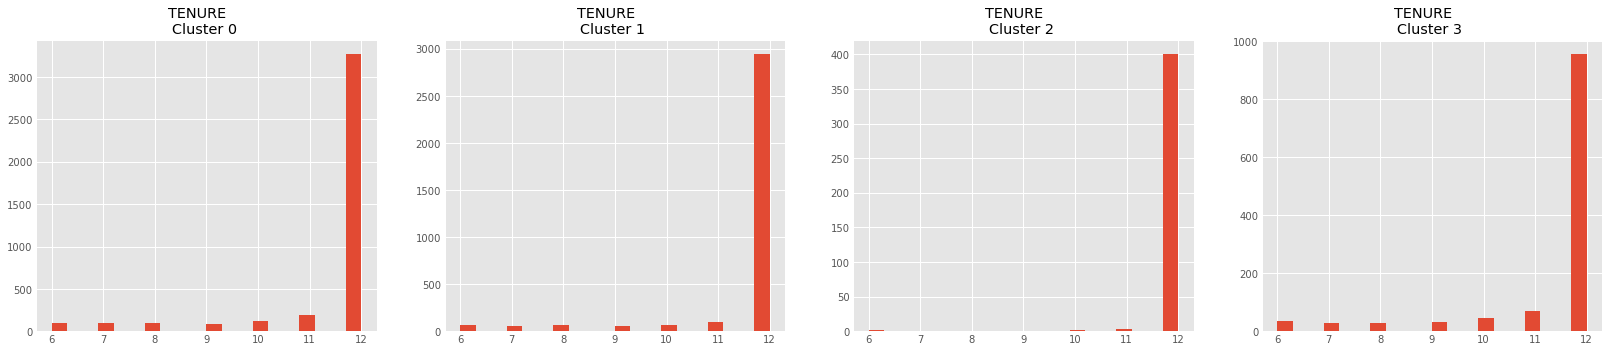

In [ ]:
# Plot the histogram of various clusters
for i in df.columns:
  plt.figure(figsize = (25, 5))
  for j in range(4):
    plt.subplot(1,4,j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))

  plt.show()

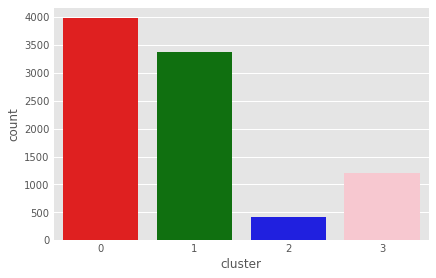

In [ ]:
sns.countplot(x=df_cluster.cluster, palette = ['red','green','blue','pink'])
plt.show()

In [ ]:
df_summary

cluster,Metrics,0,1,2,3
Column Name,,,,,
BALANCE,mean,1011.839396,894.768927,3551.153761,4602.462714
BALANCE_FREQUENCY,mean,0.789924,0.934715,0.986879,0.968415
PURCHASES,mean,270.144981,1236.263333,7681.620098,501.896219
ONEOFF_PURCHASES,mean,209.932625,593.995933,5095.878826,320.373681
INSTALLMENTS_PURCHASES,mean,60.479311,642.541696,2587.208264,181.607404
CASH_ADVANCE,mean,596.300906,209.816318,653.638891,4520.724309
PURCHASES_FREQUENCY,mean,0.170250,0.885255,0.946418,0.287731
ONEOFF_PURCHASES_FREQUENCY,mean,0.086301,0.297109,0.739031,0.138934
PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.080662,0.711930,0.788060,0.185516


**Nhận xét:**
- Em sẽ sử dụng các cột features (là biến liên tục, có giá trị riêng biệt) --> có thể thể hiện đặc điểm riêng của từng khách hàng, từng nhóm khách hàng

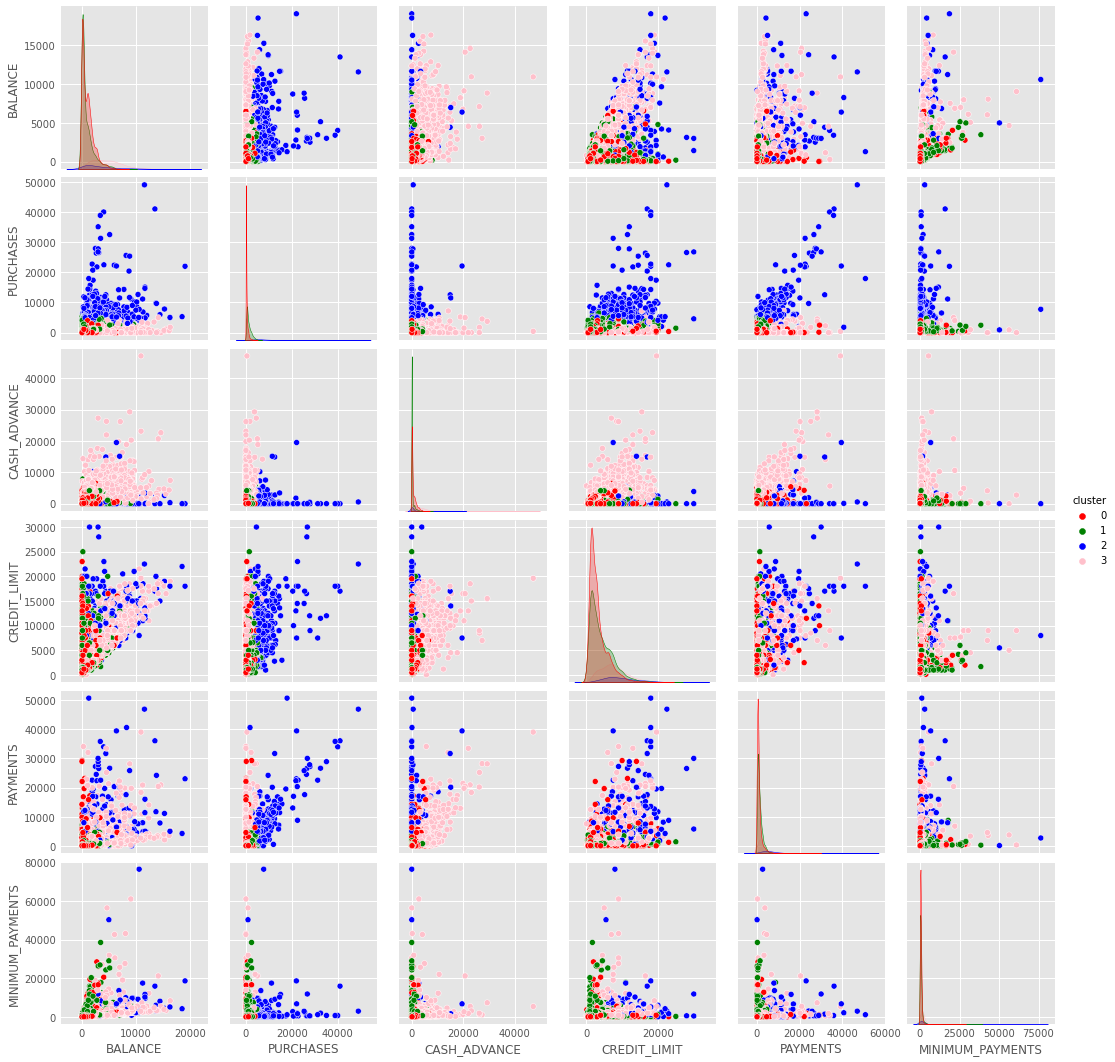

In [ ]:
cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","cluster"]
sns.pairplot(df_cluster[cols], hue="cluster",palette = ['red','green','blue','pink'])

**Nhận xét:**
- Phần lớn khách hàng thuộc Cluster 0 và Cluster 1
- Outliers thuộc cluster 2 và cluster 3 (2 clusters có số khách hàng ít nhất)
<br> *Đặc điểm khách hàng thuộc:*
- Cluster 0: khách hàng là những người có tần suất sử dụng ONEOFF_PURCHASES và INSTALLMENTS_PURCHASES (vì chỉ số _FREQUENCY thấp nhất so với các clusters khác)
- Cluster 1: có thể suy đoán rằng là, khách hàng là những người chủ yếu sử dụng INSTALLMENTS_PURCHASES (trả góp) (dẫn đến PURCHASES_FREQUENCY cao và MINIMUM_PAYMENTS thấp), ít sử dụng cho mục đích CASH_ADVANCE (thấp nhất)
- Cluster 2: Khách hàng có BALANCE_FREQUENCY cao nhất (những người thường xuyên sử dụng thẻ tín dụng). Có thể thấy được là những chỉ số ở cluster này cao hơn so với các clusters còn lại
- Cluster 3: Khách hàng là những người có BALANCE và CASH_ADVANCE (ứng tiền mặt) cao nhất

In [ ]:
df_cluster.sample(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5154,5292.264382,1.000000,0.00,0.00,0.00,3383.299741,0.000000,0.000000,0.00,0.666667,9,0,8000.0,994.210187,1051.709303,0.000000,9,3
4920,3007.664861,1.000000,534.26,365.51,168.75,0.000000,0.833333,0.583333,0.75,0.000000,0,21,16000.0,3007.941970,807.008705,0.000000,12,1
1073,1026.874467,0.909091,153.96,153.96,0.00,0.000000,0.083333,0.083333,0.00,0.000000,0,2,8500.0,1676.090994,266.069794,0.090909,12,0


**Nhận xét:**
Em sẽ phân tích 1 số sample sau khi đã phân cluster:
- sample(5154, 4920, 1073)
- Ở trên, em có phân tích đặc điểm khách hàng ở mỗi cluster. Em sẽ dựa vào đặc điểm đó để thử phân tích 3 khách hàng trên.
- với sample 5154 thuộc cluster 3: có BALANCE, BALANCE_FREQUENCY và CASH_ADVANCE cao trội hơn so với 2 samples còn lại)
- với sample 4920 thuộc cluster 1: là những khách hàng ít dùng CASH_ADVANCE nhất (giá trị ở sample này là 0), và chủ yếu sử dụng INSTALLMENTS_PURCHASES (chỉ số _FREQUENCY tương đối cao là 0.75)
- với sample 1073 thuộc cluster 0: sử dụng ONEOFF_PURCHASES và INSTALLMENTS_PURCHASES ít (vì chỉ số _FREQUENCY gần như ở mức 0)

# **5. Discussion & Conclusion**

- Áp dụng KMeans để phân loại khách hàng, mình có thể đưa ra 1 số đánh giá và sẽ đặt ra các chiến lược tiếp cận khách hàng ở mỗi cluster.
- Không hẳn outliers nào cũng xấu (trừ khi mình chứng minh được outliers đó thực sự khác biệt và có ảnh hưởng đến data của mình. Với lại nếu xoá hết outliers, tập dữ liệu của mình khi train sẽ bị overfitting.
- Thực tế, tập dữ liệu về khách hàng sẽ luôn chứa những giá trị bị thiếu và những giá trị ngoại lai. Khách hàng sử dụng dịch vụ với những mong muốn và mục đích riêng, vì vậy đây là điều bình thường.
- Sau khi dùng K-Means để phân nhóm khách hàng, như em có nhận xét ở trên, outliers thuộc 2 cluster: cluster 2 và cluster 3. Có thể nói là outliers được phân nhóm riêng, nên là mình có thể sử dụng outliers để khai thác khách hàng (hay cải thiện dịch vụ...)

Một số giải pháp và nhận xét sau đây để giảm tỷ lệ khách hàng rời đi:

1. Nâng cấp hạng thành viên trong thẻ: Cải thiện và mở rộng các loại hình thành viên có sẵn để tăng tính hấp dẫn và giá trị cho khách hàng. Cung cấp ưu đãi độc quyền, quà tặng, hoặc giảm giá đặc biệt cho các thành viên cao cấp có thể giữ chân khách hàng và khuyến khích họ duy trì thành viên.

2. Tăng tương tác và cam kết:
- Xây dựng một chiến dịch giao tiếp và tương tác tích cực với khách hàng. Gửi thư điện tử thông báo về các ưu đãi đặc biệt, sự kiện, hoạt động và khuyến mãi mới nhất có thể giúp tạo ra sự quan tâm và sự hài lòng của khách hàng.

- Khuyến khích khách hàng thực hiện giao dịch lớn hơn bằng cách cung cấp ưu đãi, giảm giá, hoặc chương trình khuyến mãi đặc biệt cho các giao dịch có giá trị cao.

4. Tối ưu hóa trải nghiệm giao dịch: Tạo ra một trải nghiệm mua hàng dễ dàng, thuận tiện và thú vị để khách hàng muốn tiếp tục giao dịch với công ty. Tăng cường tính năng trực tuyến, cung cấp thông tin và dịch vụ rõ ràng và hỗ trợ khách hàng nhanh chóng và chuyên nghiệp.

5. Đổi điểm thưởng thành giá trị thực: Cung cấp dịch vụ đổi điểm thưởng cho khách hàng như là chuyển đổi chúng thành giá trị thực. Ví dụ, cho phép khách hàng áp dụng điểm thưởng để giảm giá trực tiếp cho giao dịch hoặc sử dụng chúng để mua các sản phẩm hoặc dịch vụ.

6. Cải thiện chất lượng sản phẩm và dịch vụ: Xem xét phản hồi từ khách hàng để xác định các vấn đề chính và điều chỉnh chiến lược kinh doanh, quy trình sản xuất và dịch vụ khách hàng. Đặt chất lượng sản phẩm và dịch vụ lên hàng đầu, đảm bảo sự hài lòng và đáp ứng nhu cầu của khách hàng.

Từ các yếu tố quan trọng ảnh hưởng đến tỉ lệ rời đi của khách hàng phân tích được, có thể nhận thấy rằng sự hài lòng của khách hàng, giá trị giao dịch trung bình và số điểm trong ví tiền của khách hàng có ảnh hưởng đáng kể đến việc khách hàng rời đi. Điều này cho thấy rằng việc cải thiện trải nghiệm khách hàng, tăng tính hấp dẫn của giao dịch và quản lý chương trình thành viên có thể là những khía cạnh quan trọng để giữ chân khách hàng.